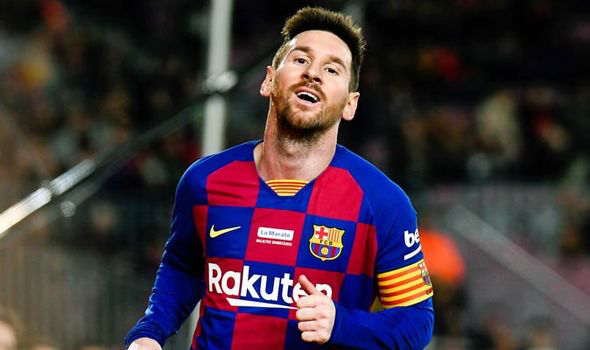

---------------------------------------------------------------------------------------
img_array.shape : (350, 590, 3)
---------------------------------------------------------------------------------------
img.size : (590, 350)
---------------------------------------------------------------------------------------
array of the image : 
[[[ 15  16  11]
  [ 15  16  11]
  [ 16  17  12]
  ...
  [  3   2   7]
  [  3   2   7]
  [  3   2   7]]

 [[ 15  16  11]
  [ 15  16  11]
  [ 15  16  11]
  ...
  [  3   2   7]
  [  3   2   7]
  [  3   2   7]]

 [[ 15  16  11]
  [ 15  16  11]
  [ 15  16  11]
  ...
  [  3   2   7]
  [  3   2   7]
  [  3   2   7]]

 ...

 [[204 167 138]
  [203 166 137]
  [201 164 135]
  ...
  [ 50  60  59]
  [ 48  58  57]
  [ 47  57  56]]

 [[208 169 140]
  [205 168 139]
  [203 166 137]
  ...
  [ 47  57  56]
  [ 46  56  55]
  [ 45  57  55]]

 [[209 170 139]
  [208 169 138]
  [204 168 136]
  ...
  [ 43  53  52]
  [ 41  53  51]
  [ 41  53  51]]]
------------------------------

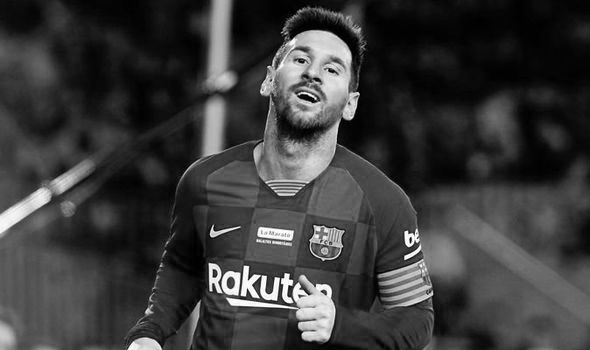

---------------------------------------------------------------------------------------
url : https://ae01.alicdn.com/kf/HTB1y47AJFXXXXcCXXXXq6xXFXXXL/P0763-lionel-messi-Neymar-FC-Barcelona-Team-Wallpaper-Poster-Wall-Art-for-Home-Decor-Canvas-Printings.jpg


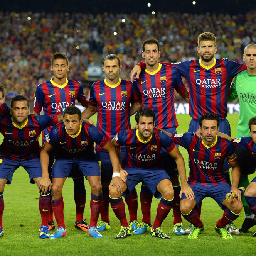

---------------------------------------------------------------------------------------
url : http://as01.epimg.net/en/imagenes/2017/12/23/football/1514021999_407396_1514022856_noticia_normal.jpg


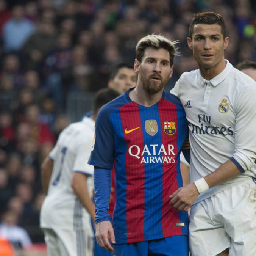

---------------------------------------------------------------------------------------
url : https://www.skynewsarabia.com/web/images/v1/2019/05/09/1250629/900/507/1-1250629.jpg


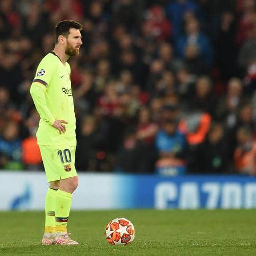

---------------------------------------------------------------------------------------
url : https://en.as.com/en/imagenes/2016/04/03/football/1459691577_014513_1459695829_noticia_normal.jpg


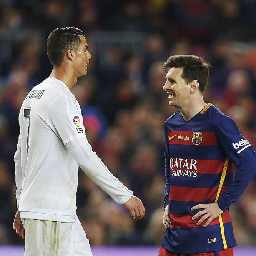

---------------------------------------------------------------------------------------
url : https://upload.wikimedia.org/wikipedia/commons/9/92/NIG-ARG_%286%29.jpg


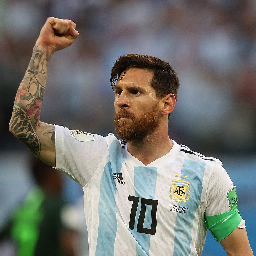

---------------------------------------------------------------------------------------
url : https://cdni.rt.com/files/2018.06/article/5b32835adda4c814518b4655.jpg


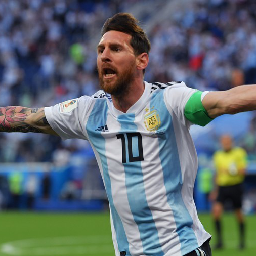

---------------------------------------------------------------------------------------
url : https://s3.reutersmedia.net/resources/r/?m=02&d=20191127&t=2&i=1457540772&r=LYNXMPEFAQ22K


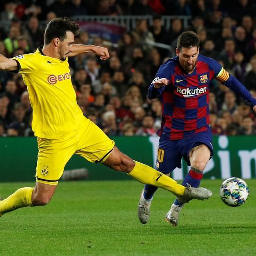

In [45]:
%tensorflow_version 2.x
import requests
import numpy as np
from io import BytesIO
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
from IPython.display import display, HTML
%matplotlib inline


response = requests.get("https://cdn.images.express.co.uk/img/dynamic/67/590x/Barcelona-star-Lionel-Messi-scored-a-hat-trick-against-RCD-Mallorca-1214446.jpg?r=1575764671302")
img1 = Image.open(BytesIO(response.content))
img1.load()
display(img1)
img1_array = np.asarray(img1)
print("---------------------------------------------------------------------------------------")
print(f"img_array.shape : {img1_array.shape}")
print("---------------------------------------------------------------------------------------")
print(f"img.size : {img1.size}")
print("---------------------------------------------------------------------------------------")
print("array of the image : ")
print(img1_array)
print("---------------------------------------------------------------------------------------")
print(f"Numeral 0 and 1 pixel is : {img1_array[0,1]}")
print("---------------------------------------------------------------------------------------")
print(f"img1_array.flatten() : " img1_array.flatten())
print("---------------------------------------------------------------------------------------")




################################################################################
#### Converting Colered image to grayscale
row = img1_array.shape[0]
col = img1_array.shape[1]

img2_array = np.zeros((row, col, 3), dtype=np.uint8)
for i in range(row):
  for j in range(col):
    img2_array[i,j] = np.mean(img1_array[i,j])          # calculating average of RGB for each pixel
img2 = Image.fromarray(img2_array, 'RGB')
display(img2)



################################################################################
#### Standardize Images (make equal size of a bunch of image)
images = [
          "https://ae01.alicdn.com/kf/HTB1y47AJFXXXXcCXXXXq6xXFXXXL/P0763-lionel-messi-Neymar-FC-Barcelona-Team-Wallpaper-Poster-Wall-Art-for-Home-Decor-Canvas-Printings.jpg",
          "http://as01.epimg.net/en/imagenes/2017/12/23/football/1514021999_407396_1514022856_noticia_normal.jpg",
          "https://www.skynewsarabia.com/web/images/v1/2019/05/09/1250629/900/507/1-1250629.jpg",
          "https://en.as.com/en/imagenes/2016/04/03/football/1459691577_014513_1459695829_noticia_normal.jpg",
          "https://upload.wikimedia.org/wikipedia/commons/9/92/NIG-ARG_%286%29.jpg",
          "https://cdni.rt.com/files/2018.06/article/5b32835adda4c814518b4655.jpg",
          "https://s3.reutersmedia.net/resources/r/?m=02&d=20191127&t=2&i=1457540772&r=LYNXMPEFAQ22K"  
          ]

def make_square(img):
  row, col = img.size
  ext = np.abs((row - col)/2)

  if(row > col):
    cropped =  img.crop((ext, 0, row-ext, col))
  elif(row < col):
    cropped = img.crop((0, ext, row, col-ext))
  else:
    cropped = img

  return cropped

for url in images:
  ImageFile.LOAD_TRUNCATED_IMAGES = False
  responses = requests.get(url)
  img = Image.open(BytesIO(responses.content))
  img.load()
  img = make_square(img)
  img = img.resize((256, 256))
  print("---------------------------------------------------------------------------------------")
  print(f"url : {url}")
  display(img)

